In [97]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

**Load the Data**

In [98]:
# Load the data
import pandas as pd
filename = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/NHANES_Diet_Diabetes_Risk.xls.csv'
df = pd.read_csv(filename)
df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,...,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,Diabetes_Risk
0,73557,16888.32786,12930.89065,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.0,70.0,110.0,60.0,304.0,278.0,1398.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,73558,17932.14387,12684.14887,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.0,1477.0,1488.0,0.0,145.0,12.0,0.0,...,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2
2,73559,59641.81293,39394.23671,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.0,616.0,655.0,21.0,449.0,35.0,515.0,...,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,73561,59052.35703,39004.89299,1,63.0,2.0,2.0,18.0,1.0,1.0,1.0,13.0,4.0,NaN,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,7.0,1421.0,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,41.0,53.17,0.0,738.0,863.0,0.0,1476.0,0.0,0.0,...,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0
4,73562,49890.82866,0.00000,1,49.0,2.0,1.0,11.0,3.0,1.0,1.0,13.0,1.0,3.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1785.0,55.11,189.59,81.75,22.6,93.92,22.155,40.013,23.550,534.0,12.30,0.0,272.0,355.0,172.0,776.0,300.0,2339.0,...,2.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0


**Preprocess the Data**

In [99]:
#make SEGN index
df.set_index('SEQN', inplace=True)

In [100]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Diabetes_Risk', axis=1)
y = df['Diabetes_Risk']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Print the shapes of the train and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4982, 167)
Shape of X_test: (1661, 167)
Shape of y_train: (4982,)
Shape of y_test: (1661,)


<Axes: >

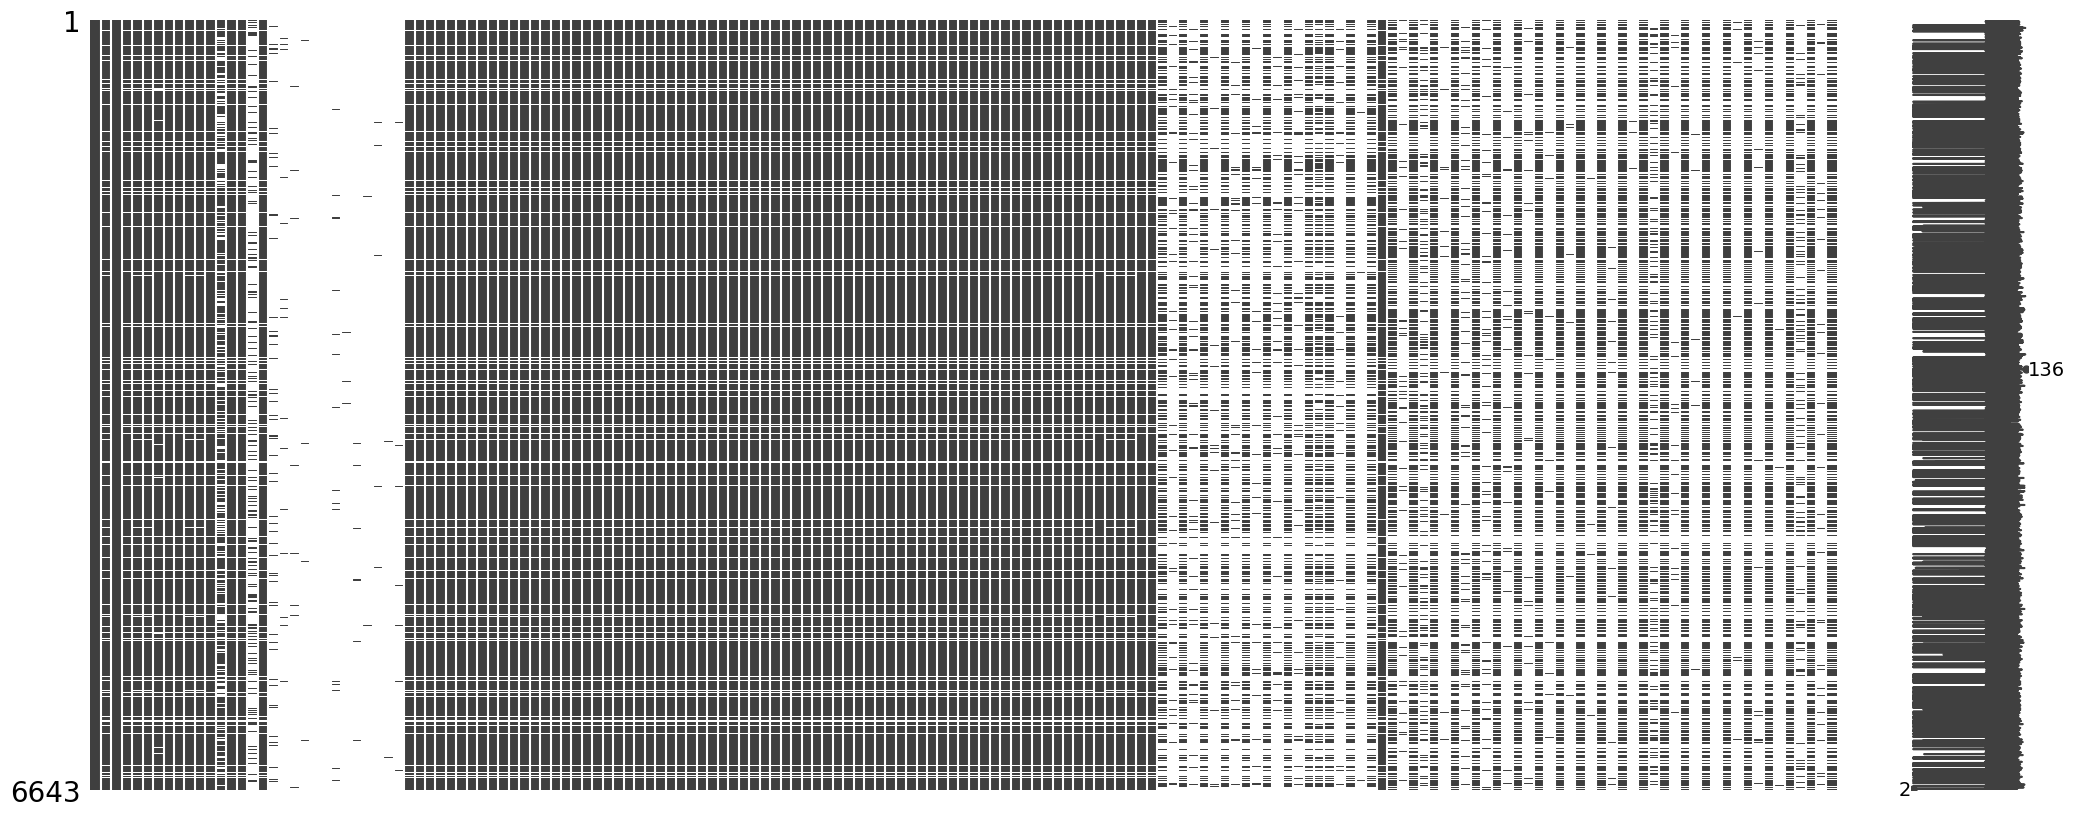

In [101]:
#check missing data
import missingno as msno
msno.matrix(X)

In [102]:
X.isna().sum()

WTDRD1         0
WTDR2D       559
DR1DRSTZ       0
DR1EXMER     518
DRABF        559
            ... 
DRD370T     2665
DRD370TQ    5664
DRD370U     2665
DRD370UQ    6373
DRD370V     2666
Length: 167, dtype: int64

In [103]:
# Instantiate SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data using the same imputer
X_test_imputed = imputer.transform(X_test)
X_train_imputed.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
77968,48684.26962,61803.80838,1.0,49.0,2.0,2.0,16.0,2.0,1.0,1.0,13.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,91.0,14.0,834.0,19.73,129.18,78.11,6.2,26.97,6.339,8.614,9.022,191.0,2.69,0.0,96.0,195.0,85.0,1152.0,14.0,2035.0,469.0,0.575,...,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.5,2.0,2.0,2.0,1.5,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.5,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
82845,24306.85882,34186.93170,1.0,49.0,2.0,2.0,13.0,5.0,1.0,1.0,13.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,91.0,19.0,2120.0,136.10,278.23,161.15,19.0,53.98,18.278,16.305,13.496,367.0,4.39,0.0,235.0,345.0,63.0,1129.0,412.0,1154.0,1133.0,1.133,...,5.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.5,2.0,2.0,2.0,1.5,2.0,1.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,1.0,2.0,1.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0,2.0,2.0,2.0
77843,21439.45658,65565.70992,1.0,14.0,2.0,2.0,3.0,7.0,1.0,1.0,13.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,91.0,7.0,1570.0,83.11,124.09,24.80,11.5,82.93,26.248,31.929,19.122,238.0,6.17,0.0,7.0,39.0,24.0,320.0,51.0,8793.0,383.0,0.998,...,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.5,2.0,2.0,2.0,1.5,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.5,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
74205,0.00000,22062.65522,5.0,49.0,2.0,2.0,16.0,5.0,1.0,1.0,13.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,91.0,15.0,1927.0,73.29,231.87,95.38,14.4,72.35,22.737,24.803,16.130,223.0,7.06,0.0,308.0,461.0,40.0,672.0,27.0,1623.0,679.0,1.408,...,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.5,2.0,2.0,2.0,1.5,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.5,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
80656,16805.01807,12497.10887,1.0,54.0,2.0,2.0,15.0,7.0,2.0,1.0,13.0,1.0,1.0,4.0,2.0,1.0,2.0,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,91.0,14.0,1527.0,70.25,207.24,72.53,17.4,48.69,13.093,18.239,12.414,443.0,4.96,0.0,646.0,703.0,84.0,570.0,196.0,839.0,1106.0,1.396,...,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.5,2.0,2.0,2.0,1.5,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.5,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0


In [104]:
'''from sklearn.impute import SimpleImputer

# Define the imputer
imputer = SimpleImputer(strategy='median')

# Impute missing values in the features
features_imputed = imputer.fit_transform(X_train)

# Create a new DataFrame with the imputed features
X_train_imputed = pd.DataFrame(features_imputed, columns=X_train.columns)
# Transform the testing data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Print the head of the imputed DataFrame
X_train_imputed.head()
'''

"from sklearn.impute import SimpleImputer\n\n# Define the imputer\nimputer = SimpleImputer(strategy='median')\n\n# Impute missing values in the features\nfeatures_imputed = imputer.fit_transform(X_train)\n\n# Create a new DataFrame with the imputed features\nX_train_imputed = pd.DataFrame(features_imputed, columns=X_train.columns)\n# Transform the testing data using the same imputer\nX_test_imputed = imputer.transform(X_test)\n\n# Print the head of the imputed DataFrame\nX_train_imputed.head()\n"

In [105]:
X_train_imputed.isna().sum()

WTDRD1      0
WTDR2D      0
DR1DRSTZ    0
DR1EXMER    0
DRABF       0
           ..
DRD370T     0
DRD370TQ    0
DRD370U     0
DRD370UQ    0
DRD370V     0
Length: 166, dtype: int64

<Axes: >

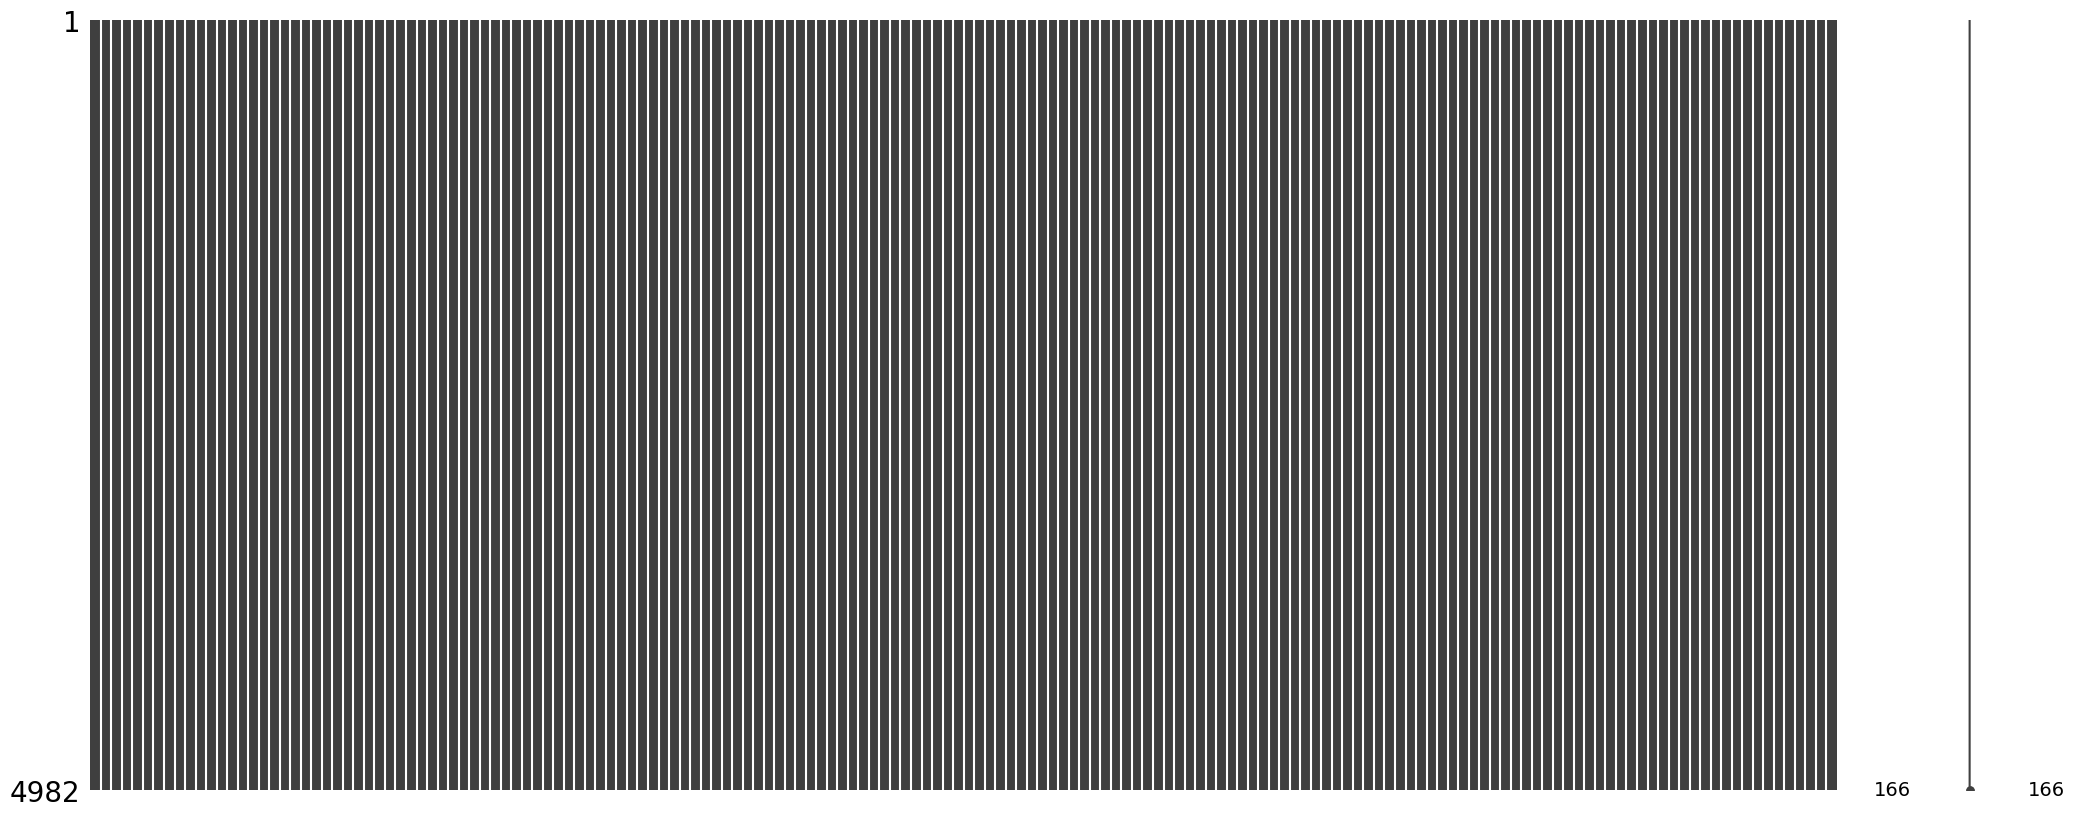

In [106]:
#check missing data
import missingno as msno
msno.matrix(X_train_imputed)

In [107]:

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test_imputed)

**Model - No PCA**

In [108]:
#Instantiate KNeighborsClassifier with default parameters
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [109]:
%%time
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

CPU times: user 410 ms, sys: 0 ns, total: 410 ms
Wall time: 363 ms


In [110]:

def evaluate_classification_model(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    # Calculate precision, recall, and F1-score for each class
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)

    # Print precision, recall, and F1-score for each class
    for i, (prec, rec, f1_) in enumerate(zip(precision, recall, f1)):
        print(f"Class {i}: Precision={prec}, Recall={rec}, F1-score={f1_}")

    # Calculate micro-averaged precision, recall, and F1-score
    micro_precision = precision_score(y_true, y_pred, average='micro')
    micro_recall = recall_score(y_true, y_pred, average='micro')
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    print("Micro-averaged Precision:", micro_precision)
    print("Micro-averaged Recall:", micro_recall)
    print("Micro-averaged F1-score:", micro_f1)

    # Calculate macro-averaged precision, recall, and F1-score
    macro_precision = precision_score(y_true, y_pred, average='macro')
    macro_recall = recall_score(y_true, y_pred, average='macro')
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print("Macro-averaged Precision:", macro_precision)
    print("Macro-averaged Recall:", macro_recall)
    print("Macro-averaged F1-score:", macro_f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)


In [111]:
# Make predictions on the PCA-transformed test data
# Create the KNN classifier object
knn_classifier_pca = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_classifier_pca.fit(X_train_scaled, y_train)

preds_pca = knn_classifier_pca.predict(X_test_scaled)

# Evaluate the model
evaluate_classification_model(y_test, preds_pca)

Accuracy: 0.8061408789885611
Class 0: Precision=0.8160146699266504, Recall=0.9874260355029586, F1-score=0.893574297188755
Class 1: Precision=0.0625, Recall=0.006756756756756757, F1-score=0.012195121951219513
Class 2: Precision=0.3333333333333333, Recall=0.018633540372670808, F1-score=0.03529411764705882
Micro-averaged Precision: 0.8061408789885611
Micro-averaged Recall: 0.8061408789885611
Micro-averaged F1-score: 0.8061408789885611
Macro-averaged Precision: 0.40394933441999453
Macro-averaged Recall: 0.3376054442107954
Macro-averaged F1-score: 0.3136878455956778
Confusion Matrix:
[[1335   12    5]
 [ 146    1    1]
 [ 155    3    3]]


**Transform the data with PCA​**

In [112]:
# Instantiate PCA with n_components set to the desired percentage of variance
pca = PCA(n_components=0.95)

In [113]:
# Create a PCA object with 95% explained variance
pca = PCA(n_components=0.95)

# Fit the PCA object to the scaled data
pca.fit(X_train_scaled)

# Transform the data
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the shape of the transformed data
print(f"Shape of X_pca: {X_train_pca.shape}")

Shape of X_pca: (4982, 99)


In [114]:
X_train_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
77968,-6.597399,-0.262806,-0.420246,0.269877,-0.370822,-0.285830,-0.180692,-0.071854,-0.126555,1.104521,-0.434834,0.101898,-0.398372,-0.907123,-0.120316,0.121544,0.615738,-1.434434,0.141389,0.348497,0.924223,-0.949864,-0.465433,0.499729,-0.165423,0.062897,-0.044416,-0.060806,0.028899,0.597986,0.678350,0.331056,0.080391,-0.422242,-0.390917,-0.362536,-0.311553,0.275719,-0.143243,0.216444,0.019384,-0.063381,0.110412,0.472953,0.049624,0.109173,-0.525622,-0.094980,0.130128,0.303654,0.021281,-0.149765,-0.007319,0.047993,0.127043,-0.441369,0.374589,-0.230428,0.232142,0.323691,0.118958,-0.636907,-0.265749,-0.207404,-0.052640,-0.133917,0.487637,0.099766,-0.333256,0.313088,-0.002385,0.358025,0.175626,-0.024978,-0.116769,-0.176021,0.410577,0.027136,-0.073070,0.187028,-0.313003,0.292264,0.072993,0.392192,0.245558,-0.420384,0.813939,0.406003,-0.086025,-0.605597,0.057758,0.996556,-1.349430,-0.194393,0.384838,0.251617,1.153820,0.176216,0.522314
82845,0.595930,2.353590,0.771411,-0.060242,0.277856,-0.403397,0.149477,-2.128104,0.025937,-0.838242,0.791950,0.622366,0.083092,0.799031,0.518416,0.299091,-0.761732,-0.466050,0.541362,1.328029,0.310081,-0.035765,-0.197697,-0.240587,0.309809,0.493423,0.290409,0.224713,1.419165,-0.889179,-0.696381,-0.893972,2.564866,0.829993,1.526515,0.874970,-0.559852,-0.512804,0.855710,-1.414492,0.006044,0.316092,-0.261166,0.389358,0.223201,1.180721,-0.982310,-0.291165,-1.536417,0.797057,0.467714,-0.683231,-0.207709,-0.217414,0.887761,0.641092,0.520270,-0.453636,-0.068825,0.091991,1.116547,-0.565234,0.325464,-0.293093,0.640258,0.045429,0.198811,-0.274253,-0.574689,-0.359568,0.187150,-0.357577,-0.271193,-0.653545,0.941000,-0.503158,-0.682782,-0.615339,-0.061948,-0.573618,-0.196727,-0.232185,0.727134,0.501950,-0.206911,0.334700,-0.020768,-0.490997,0.211739,0.220977,-0.275401,0.082072,-0.190511,-0.363694,0.435339,0.031148,0.282803,-0.058641,0.066106
77843,-2.340038,-0.429377,-0.789915,1.326619,-1.210026,-0.623992,-0.824615,-2.099103,0.588884,-0.743452,1.061023,0.878598,1.130160,-0.245671,-1.347723,-0.534976,0.618965,0.544989,0.435945,-0.609887,-0.303803,0.280941,-0.061321,-0.201813,-0.554467,0.019902,-0.184720,-0.307467,0.213979,0.851010,0.649902,0.655900,-1.504706,-0.215562,0.719451,-0.813548,-0.143772,0.174746,-0.309251,0.181439,0.295602,0.120286,0.614324,-0.036470,0.713480,-0.837011,-0.366435,-0.524060,-0.161116,-0.661227,-0.518578,-0.813012,-0.668043,-0.393561,0.729002,0.065593,-0.183021,-0.088696,-0.328876,-1.089336,-0.477971,-0.165386,0.755260,0.321433,-0.036500,0.346545,-0.249456,-0.497854,-0.165390,1.014622,-0.223286,0.559007,0.464823,0.332911,-0.278439,0.092930,-0.364282,0.207065,-0.284451,0.182273,-0.042173,-0.010345,0.590346,-0.252268,0.298280,1.294927,-0.012126,0.147378,-0.295662,0.078692,-0.531029,-0.616921,-0.125644,-0.183902,0.431207,0.039456,-0.685177,0.426961,-0.207115
74205,-1.772125,-1.199991,0.070906,1.165836,-0.127275,-0.259865,-0.539814,0.523937,-0.770576,-0.904121,0.387045,-0.935039,0.371223,0.825720,-0.498417,0.238283,-0.599185,-0.430727,-0.044222,0.446104,-0.686980,0.533343,-0.073644,1.164983,-0.122035,-0.388631,-1.151653,0.701472,-0.641156,0.565689,-0.304428,-0.126531,0.422060,-0.230572,-0.367719,0.340144,-0.392732,-0.060954,-0.101779,0.309960,0.108777,-0.485630,0.187191,0.143364,0.013989,0.125530,-0.361668,0.448767,-0.4

In [115]:
# Get the number of principal components
n_components = pca.n_components_

# Print the number of principal components
print(f"Number of principal components: {n_components}")

Number of principal components: 99


**Model - With PCA**

In [116]:
#from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn_classifier_pca = KNeighborsClassifier()

# Fit the KNN model to the PCA data
knn_classifier_pca.fit(X_train_pca, y_train)
knn_classifier_pca

KNeighborsClassifier()

In [117]:
# Record the time it takes to make predictions with PCA data
%%time
preds_pca = knn_classifier_pca.predict(X_test_pca)

CPU times: user 269 ms, sys: 0 ns, total: 269 ms
Wall time: 173 ms


In [118]:
# Evaluate the model
evaluate_classification_model(y_test, preds_pca)

Accuracy: 0.8061408789885611
Class 0: Precision=0.8161270616982285, Recall=0.9881656804733728, F1-score=0.8939444630311141
Class 1: Precision=0.1111111111111111, Recall=0.013513513513513514, F1-score=0.024096385542168676
Class 2: Precision=0.16666666666666666, Recall=0.006211180124223602, F1-score=0.011976047904191616
Micro-averaged Precision: 0.8061408789885611
Micro-averaged Recall: 0.8061408789885611
Micro-averaged F1-score: 0.8061408789885611
Macro-averaged Precision: 0.36463494649200207
Macro-averaged Recall: 0.3359634580370366
Macro-averaged F1-score: 0.3100056321591581
Confusion Matrix:
[[1336   12    4]
 [ 145    2    1]
 [ 156    4    1]]


**Compare the models**

Q1. How many features were used in the first model, and how many PCs were used in the PCA model?

In [119]:
# Number of features in the first model
n_features = X_train.shape[1]

# Number of PCs used in the PCA model
n_components = pca.n_components_

# Print the results
print(f"Number of features in the first model: {n_features}")
print(f"Number of PCs used in the PCA model: {n_components}")

Number of features in the first model: 167
Number of PCs used in the PCA model: 99


Q2. Which model performed the best on the test set?

knn_classifier_pca is a best model

Which model was the fastest at making predictions?
knn_classifier_pca